In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.dcceew.gov.au/climate-change/policy/climate-science/understanding-climate-change#:~:text=The%20greenhouse%20effect%20is%20a,re%2Dradiated%20by%20greenhouse%20gases.

## 1: Introduction

## 2: Data Start

In [14]:
df_atmosphere: pd.DataFrame = (
    pd.read_csv("../../homework/hw1b/hw-01b-datasets/atmospheric-concentration-of-carbon-dioxide-5.csv")
)
df_atmosphere.sample(5, random_state=123)

,Year:year,Value:number,Polutant:text
30,1900,295.80,CO2 (ppm)
72,2004,376.61,CO2 (ppm)
242,2000,316.14,N2O (ppb)
125,1940,1102.40,CH4 (ppb)
201,1885,278.70,N2O (ppb)


In [15]:
df_atmosphere_co2: pd.DataFrame = df_atmosphere[df_atmosphere["Polutant:text"] == "CO2 (ppm)"]
df_atmosphere_co2.sample(5, random_state=123)

,Year:year,Value:number,Polutant:text
4,1770,278.60,CO2 (ppm)
84,2016,402.87,CO2 (ppm)
56,1988,350.93,CO2 (ppm)
35,1925,305.00,CO2 (ppm)
45,1975,331.30,CO2 (ppm)


In [16]:
df_temp: pd.DataFrame = pd.read_csv("../../homework/hw1b/hw-01b-datasets/global-temperature.csv", skiprows=range(1,5))
df_temp.sample(10)

,Global Land and Ocean August Temperature Anomalies
1991,0.37
1889,-0.12
1990,0.38
1916,-0.27
1989,0.32
1893,-0.28
2014,0.83
1952,0.06
1896,-0.03
1945,0.29


In [17]:
# Reset the index for df_temp so that "year" becomes a regular column
df_temp_reset = df_temp.reset_index()

# Rename the column to 'Year:year' to match the column name in df_atmosphere_co2
df_temp_reset = df_temp_reset.rename(columns={"index": "Year:year"})

# Perform the inner join on the "Year:year" column
df: pd.DataFrame = pd.merge(df_temp_reset, df_atmosphere_co2, on="Year:year", how="inner")
df.head()

,Year:year,Global Land and Ocean August Temperature Anomalies,Value:number,Polutant:text
0,1850,-0.11,284.7,CO2 (ppm)
1,1855,-0.14,285.4,CO2 (ppm)
2,1860,-0.24,286.2,CO2 (ppm)
3,1865,-0.09,286.9,CO2 (ppm)
4,1870,-0.16,287.5,CO2 (ppm)


In [18]:
# First, filter the data for the years 1850-1900 and compute the mean temperature
reference_mean_temp: float = (
    df.loc[
        df['Year:year'].between(1850, 1900),
        'Global Land and Ocean August Temperature Anomalies'
    ].mean()
)

df2 = pd.DataFrame()
df2["Year"] = df["Year:year"]

# Subtract the reference mean temperature from the temperature data
df2['GMTA'] = df['Global Land and Ocean August Temperature Anomalies'] - reference_mean_temp

# 2. Calculate the "excess CO2"
df2['ECO2'] = df['Value:number'] - 280

# Note: Replace 'temperature_column_name' and 'co2_column_name' with the actual column names from your DataFrame
df2.head()

,Year,GMTA,ECO2
0,1850,0.056364,4.7
1,1855,0.026364,5.4
2,1860,-0.073636,6.2
3,1865,0.076364,6.9
4,1870,0.006364,7.5


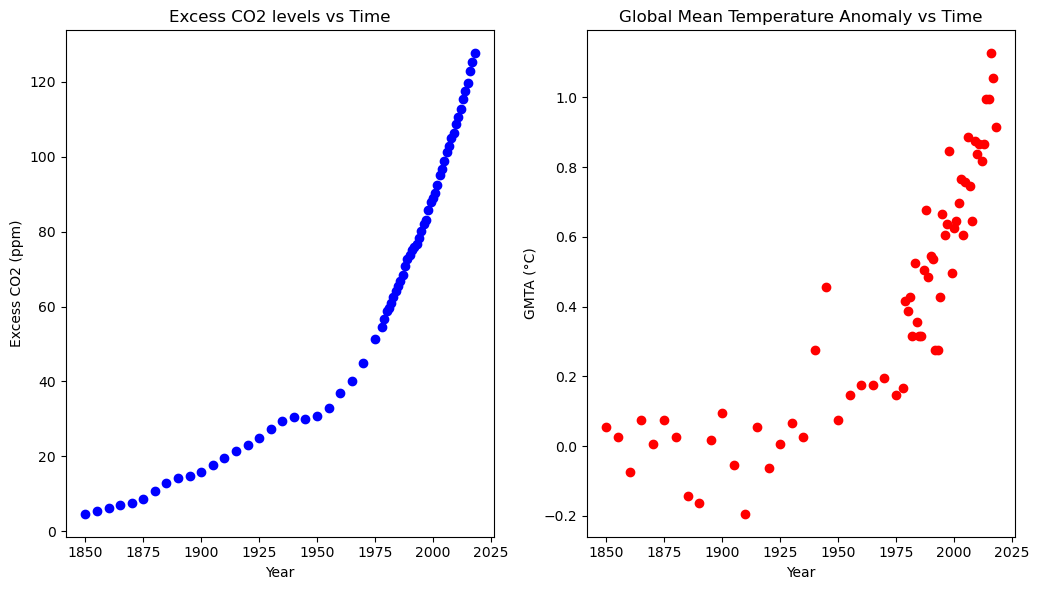

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10.5, 6))

# Plotting ECO2 levels vs time on the left
ax1.scatter(df2["Year"], df2["ECO2"], color='blue', label="ECO2")
ax1.set_title("Excess CO2 levels vs Time")
ax1.set_xlabel("Year")
ax1.set_ylabel("Excess CO2 (ppm)")

# Plotting GMTA levels vs time on the right
ax2.scatter(df2["Year"], df2["GMTA"], color='red', label="GMTA")
ax2.set_title("Global Mean Temperature Anomaly vs Time")
ax2.set_xlabel("Year")
ax2.set_ylabel("GMTA (°C)")

plt.tight_layout()
plt.savefig("plots/co2_global-temp_timeseries_raw.png")
plt.show()

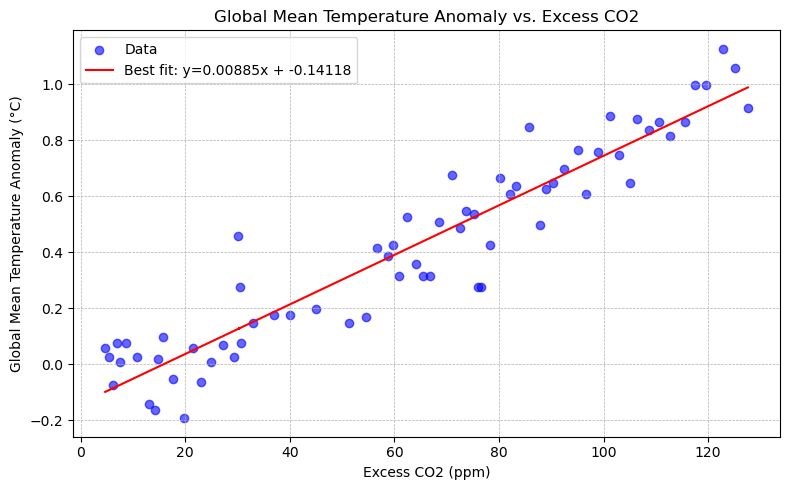

EVR: 0.8900
UVR: 0.1100


In [20]:
# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df2['ECO2'], df2['GMTA'], color='blue', alpha=0.6, label='Data')
plt.title('Global Mean Temperature Anomaly vs. Excess CO2')
plt.xlabel('Excess CO2 (ppm)')
plt.ylabel('Global Mean Temperature Anomaly (°C)')

# If you wish to show a line of best fit, you can use np.polyfit
m, b = np.polyfit(df2['ECO2'], df2['GMTA'], 1)
plt.plot(df2['ECO2'], m*df2['ECO2'] + b, color='red', label=f'Best fit: y={m:.5f}x + {b:.5f}')

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("plots/gmta_vs_eco2_raw.png")
plt.show()

# Calculate EVR and UVR
y_pred = m*df2['ECO2'] + b
residuals = df2['GMTA'] - y_pred

total_variance = np.var(df2['GMTA'])
explained_variance = np.var(y_pred)
unexplained_variance = total_variance - explained_variance

EVR = explained_variance / total_variance
UVR = unexplained_variance / total_variance

# Print EVR and UVR
print(f"EVR: {EVR:.4f}")
print(f"UVR: {UVR:.4f}")

In [21]:
df2_outliers = (
    df2[(df2["Year"] == 1945) | (df2["Year"] == 1993) | (df2["Year"] == 1992)]
)
df2_outliers.head()

,Year,GMTA,ECO2
19,1945,0.456364,30.10
40,1992,0.276364,75.90
41,1993,0.276364,76.63


In [22]:
df3 = df2[~((df2["Year"] == 1945) | (df2["Year"] == 1993) | (df2["Year"] == 1992))]
df3.sample(10)

,Year,GMTA,ECO2
31,1983,0.526364,62.47
58,2010,0.836364,108.71
44,1996,0.606364,82.01
39,1991,0.536364,75.15
7,1885,-0.143636,13.00
6,1880,0.026364,10.70
15,1925,0.006364,25.00
64,2016,1.126364,122.87
26,1978,0.166364,54.60
55,2007,0.746364,102.89


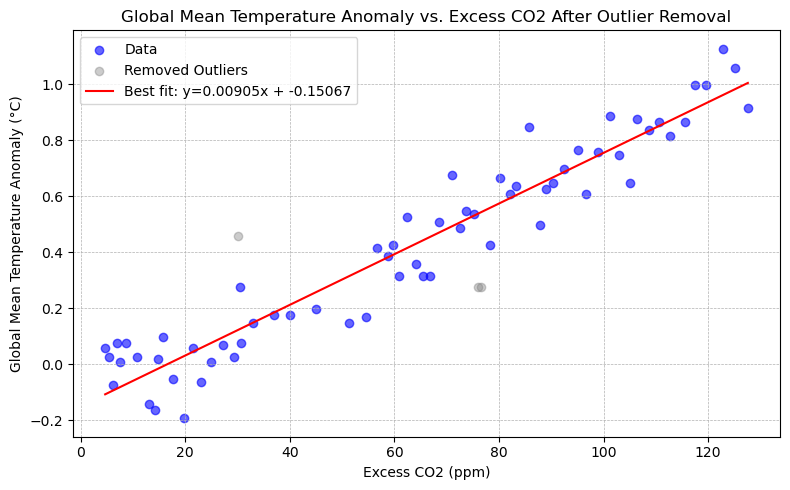

EVR: 0.9202
UVR: 0.0798


In [23]:
# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df3['ECO2'], df3['GMTA'], color='blue', alpha=0.6, label='Data')
plt.scatter(df2_outliers['ECO2'], df2_outliers['GMTA'], color='grey', alpha=0.4, label='Removed Outliers')
plt.title('Global Mean Temperature Anomaly vs. Excess CO2 After Outlier Removal')
plt.xlabel('Excess CO2 (ppm)')
plt.ylabel('Global Mean Temperature Anomaly (°C)')

# If you wish to show a line of best fit, you can use np.polyfit
m, b = np.polyfit(df3['ECO2'], df3['GMTA'], 1)
plt.plot(df3['ECO2'], m*df3['ECO2'] + b, color='red', label=f'Best fit: y={m:.5f}x + {b:.5f}')

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("plots/gmta_vs_eco2_outlier_removal.png")
plt.show()

# Calculate EVR and UVR
y_pred = m*df3['ECO2'] + b
residuals = df3['GMTA'] - y_pred

total_variance = np.var(df3['GMTA'])
explained_variance = np.var(y_pred)
unexplained_variance = total_variance - explained_variance

EVR = explained_variance / total_variance
UVR = unexplained_variance / total_variance

# Print EVR and UVR
print(f"EVR: {EVR:.4f}")
print(f"UVR: {UVR:.4f}")

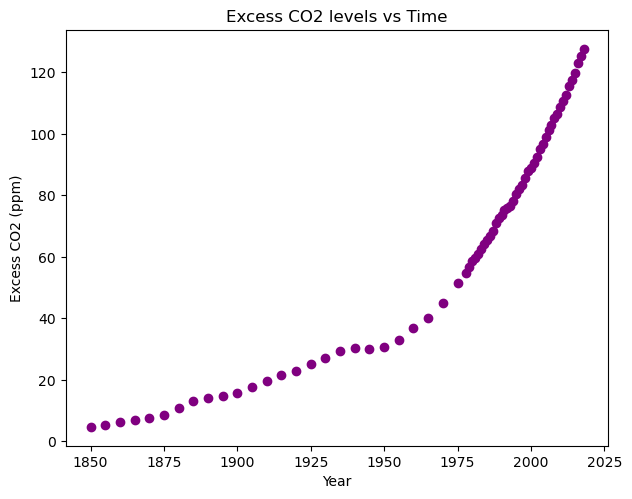

In [45]:
import matplotlib.gridspec as gridspec

# Create a gridspec layout
# fig = plt.figure(figsize=(12, 10))
# gs = gridspec.GridSpec(2, 2, height_ratios=[1, 2])

# (a) Plot - ECO2 levels vs Time
# ax1 = plt.subplot(gs[0])
fig, ax = plt.subplots(figsize=(7,5.4))
ax.scatter(df2["Year"], df2["ECO2"], color='purple', label="ECO2")
ax.set_title("Excess CO2 levels vs Time")
ax.set_xlabel("Year")
ax.set_ylabel("Excess CO2 (ppm)")
fig.savefig("plots/co2_ts.png")

# Data filtering for (c) plot
# df3 = df2[~((df2["Year"] == 1945) | (df2["Year"] == 1993) | (df2["Year"] == 1992))]
# # df2_outliers = ...  # Get your outliers

# # (c) Plot - GMTA vs ECO2 with outliers removed
# ax3 = plt.subplot(gs[2:])
# ax3.scatter(df3['ECO2'], df3['GMTA'], color='blue', alpha=0.6, label='Data')
# ax3.scatter(df2_outliers['ECO2'], df2_outliers['GMTA'], color='grey', alpha=0.4, label='Removed Outliers')
# ax3.set_title('Global Mean Temperature Anomaly vs. Excess CO2 After Outlier Removal')
# ax3.set_xlabel('Excess CO2 (ppm)')
# ax3.set_ylabel('Global Mean Temperature Anomaly (°C)')
# m, b = np.polyfit(df3['ECO2'], df3['GMTA'], 1)
# ax3.plot(df3['ECO2'], m*df3['ECO2'] + b, color='red', label=f'Best fit: y={m:.5f}x + {b:.5f}')
# ax3.legend()
# ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

# plt.tight_layout()
# plt.savefig("plots/combined_plot.png")
# plt.show()

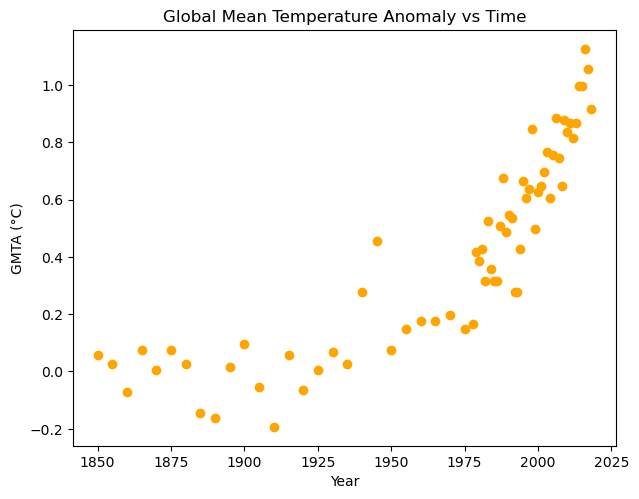

In [46]:
fig, ax = plt.subplots(figsize=(7,5.4))
ax.scatter(df2["Year"], df2["GMTA"], color='orange', label="GMTA")
ax.set_title("Global Mean Temperature Anomaly vs Time")
ax.set_xlabel("Year")
ax.set_ylabel("GMTA (°C)")
fig.savefig("plots/gmta_ts")

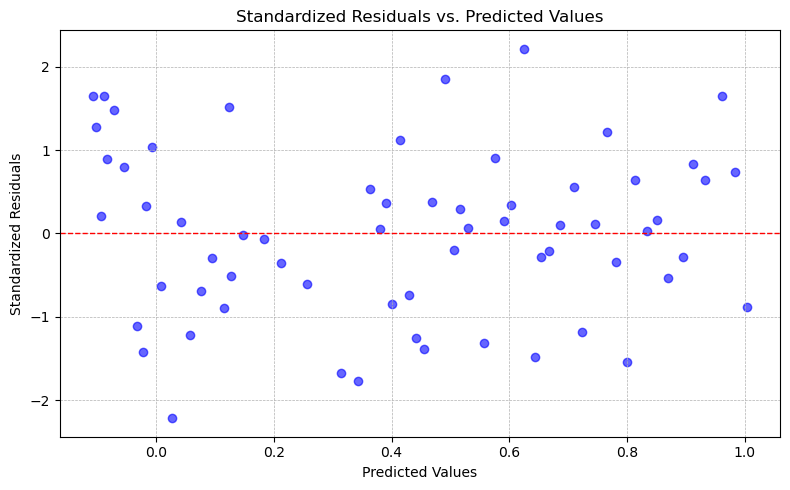

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate standardized residuals
std_residuals = residuals / np.std(residuals)

plt.figure(figsize=(8, 5))

# Scatter plot of standardized residuals vs. predicted values
plt.scatter(y_pred, std_residuals, alpha=0.6, color='blue')

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Labeling the axes and the plot
plt.title("Standardized Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")

# Optional: adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()

# Save the figure
plt.savefig("plots/standardized_residuals_plot.png")
plt.show()


In [49]:
df3[df3["Year"] == 2018]

,Year,GMTA,ECO2
66,2018,0.916364,127.58


## Section 3